# SSD (Single Shot MultiBox Detector)

參考: [GitHub - yatengLG/SSD-Pytorch](https://github.com/yatengLG/SSD-Pytorch)  
　　  [SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325)

## 模型訓練

In [ ]:
import sys

sys.path.append('SSD_PyTorch')

from Model import SSD, Trainer, Evaler
import Model
import Data
from Configs import _C as cfg
from Data import SSDTramsfrom,SSDTargetTransform

In [ ]:
# 訓練資料
train_dataset = Data.VOCDataset(cfg, is_train=True,
                                transform=Data.SSDTramsfrom(cfg,is_train=True),
                                target_transform=Data.SSDTargetTransform(cfg))

# 測試資料
test_dataset = Data.VOCDataset(cfg=cfg, is_train=False,
                               transform=Data.SSDTramsfrom(cfg=cfg, is_train=False),
                               target_transform=Data.SSDTargetTransform(cfg))

In [ ]:
# 初始化SSD模型
net = Model.SSD(cfg)
# 根據cfg，把模型移動到GPU上
net.to(cfg.DEVICE.MAINDEVICE)

# 用cfg初始化訓練器
trainer = Model.Trainer(cfg)

#print(trainer.optimizer)

# 開始訓練
trainer(net, train_dataset)

## 辨識圖片

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import sys

In [6]:
# 初始化SSD模型
net = Model.SSD(cfg)
# 使用GPU加速
net.to('cuda')
# 載入訓練後權重
net.load_pretrained_weight('SSD_PyTorch/Weights/trained/model_4000.pkl')

 --- base_model = vgg16_ssd300 --- 
 --- load weight finish ---


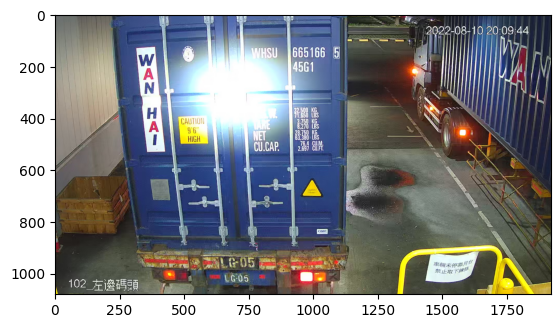

In [8]:
# 載入要辨識的圖片
image = Image.open(r'SSD_PyTorch/image_0001.jpg')
plt.imshow(image)
plt.show()

Detect 100 object, inference cost 320.55 ms


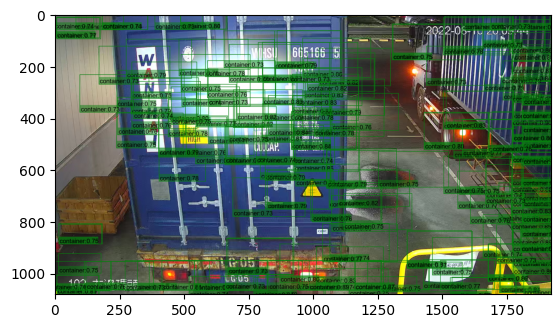

In [10]:
# 辨識圖片中號碼區域
drawn_image = image.copy()
drawn_image, boxes, labels, scores = net.Detect_single_img(image=image,score_threshold=0.5)
plt.imshow(drawn_image)
plt.show()

## 驗證
AP & mAP

In [ ]:
# 初始化SSD模型
net = Model.SSD(cfg)
# 根據cfg，把模型移動到GPU上
net.to(cfg.DEVICE.MAINDEVICE)
# 載入訓練後權重
net.load_pretrained_weight('SSD_PyTorch/Weights/trained/model_4000.pkl')
# 用cfg初始化驗證器
evaler = Model.Evaler(cfg, eval_devices=None)
# 開始驗證
ap, map = evaler(model=net,
                 test_dataset=test_dataset)

print(f'AP: {ap}')
print(f'mAP: {map}')